# Project 2 report

In [182]:
# Imports
import numpy as np
import pandas as pd
import folium
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.ticker import FormatStrFormatter
import json
import os
import plotly
#from ipywidgets import interact, interactive
#from iPython.display import display
import descartes
from shapely.geometry import Point, Polygon
from datetime import datetime
# Params
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

# Q0: Basic EDA + Tidying

In [6]:
# Read in data
df = pd.read_csv('data/dft_rawcount_region_id_3.csv', low_memory=False)

In [7]:
df.head() # Quickly viewing variables

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,931907,N,2019,2019-06-17,18,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,8,2,290,5,20,0,0,0,0,0,0,0,317
1,931907,S,2019,2019-06-17,13,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,1,1,258,4,36,4,2,0,1,0,0,7,306
2,931907,N,2019,2019-06-17,9,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,5,1,270,5,44,5,2,0,1,0,0,8,328
3,931907,S,2019,2019-06-17,12,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,2,2,266,4,50,2,5,0,2,0,0,9,331
4,931907,S,2019,2019-06-17,10,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,4,0,247,8,35,2,3,0,3,0,0,8,298


In [8]:
df.describe(include='all') # Basic EDA

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,279480.000000,279480,279480.000000,279480,279480.000000,279480.0,279480,279480.000000,279480,279480,279480,129832,129832,279480.000000,2.794800e+05,279480.000000,279480.000000,130180.000000,130180.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000
unique,NaN,5,NaN,1870,NaN,NaN,1,NaN,32,495,2,1102,1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,S,NaN,2018-09-10,NaN,NaN,Scotland,NaN,Fife,U,Minor,LA Boundary,LA Boundary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,73812,NaN,720,NaN,NaN,279480,NaN,18672,65220,149300,5092,6720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,523774.702462,NaN,2009.839717,NaN,12.500114,3.0,NaN,36.467626,NaN,NaN,NaN,NaN,NaN,295346.349921,7.115550e+05,56.282931,-3.684153,5.114988,3.178153,0.949953,1.621043,289.582002,5.314599,45.802057,11.047005,1.907321,1.589624,1.884825,4.141266,4.335520,24.905560,367.225261
std,447914.220640,NaN,5.797134,NaN,3.452059,0.0,NaN,23.418558,NaN,NaN,NaN,NaN,NaN,56623.729924,9.782121e+04,0.879098,0.921907,6.102640,3.792216,2.648190,3.392475,473.267874,9.445987,84.355333,23.660169,4.486867,4.527732,5.186480,13.185730,14.198993,57.849017,602.689129
min,700.000000,NaN,2000.000000,NaN,7.000000,3.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,70406.000000,5.390000e+05,54.721418,-7.443134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50763.000000,NaN,2005.000000,NaN,10.000000,3.0,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,257914.000000,6.612000e+05,55.832609,-4.275173,1.300000,0.810000,0.000000,0.000000,32.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
50%,811309.000000,NaN,2009.000000,NaN,13.000000,3.0,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,291905.000000,6.752400e+05,55.973501,-3.743832,2.700000,1.680000,0.000000,0.000000,126.000000,2.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,159.000000
75%,951133.000000,NaN,2015.000000,NaN,16.000000,3.0,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,334930.000000,7.418300e+05,56.562551,-3.042314,6.600000,4.100000,1.000000,2.000000,346.000000,6.000000,49.000000,11.000000,2.000000,1.000000,1.000000,2.000000,2.000000,20.000000,431.000000


### Removing unnecessary columns

In [9]:
df_tidy = df.copy() # Tidy dataset storage

# Cols to drop
rm_cols = ['region_id', 'region_name', 'local_authority_id', 'road_type',
           'start_junction_road_name', 'end_junction_road_name',
           'year', 'easting', 'northing', 'link_length_miles', 'hgvs_2_rigid_axle',
           'hgvs_3_rigid_axle', 'hgvs_3_or_4_articulated_axle',
           'hgvs_4_or_more_rigid_axle', 'hgvs_5_articulated_axle',
           'hgvs_6_articulated_axle']

# Drop cols
df_tidy.drop(rm_cols, axis=1, inplace=True)

### Renaming Vehicle Labels 

In [10]:
new_names = ['bikes', 'motorcycles', 'cars', 'buses', 'lgvs', 'hgvs'] # More interpretable labels
name_mappings = dict(zip(df_tidy.columns[9:-1], new_names)) # Creating dict of label mappings
df_tidy.rename(columns=name_mappings, inplace=True) # Renaming columns

### Tidy Transformations

In [11]:
# all_motor_vehicles --> all_vehicles (include bikes)
df_tidy['all_vehicles'] = df_tidy['bikes'] + df_tidy['motorcycles'] + df_tidy['cars'] + df_tidy['buses'] + \
                          df_tidy['lgvs'] + df_tidy['hgvs']

# New column for specifying whether road is: M, A, B, C, U
df_tidy = df_tidy.assign(
            road_type = lambda dataframe: dataframe['road_name'].map(lambda road_name: road_name[0]))

# Convert count_date to datetime format
df_tidy['count_date'] = pd.to_datetime(df['count_date'], format='%Y-%m-%d')

### Adding Population Data

In [12]:
# Read in population statistics
# CITATION NEEDED
pop_df = pd.read_csv('data/scotland-mid-year-pop-est-19.csv', header=None)

# Rename columns
pop_df.rename(columns={0: 'local_authority_name', 1: 'population'}, inplace=True)

# Convert population to int
pop_df.population = pop_df.population.str.replace(',', '')
pop_df.population = pop_df.population.astype('int') 

# String replaces to avoid join issues
pop_df.local_authority_name = pop_df.local_authority_name.str.replace('Na h-Eileanan Siar', 'Eilean Siar')
df_tidy.local_authority_name = df_tidy.local_authority_name.str.replace('Comhairle nan Eilean Siar', 'Eilean Siar')
df_tidy.local_authority_name = df_tidy.local_authority_name.str.replace('&', 'and')

# Overwrite df_tidy with full outer join with population data`
df_tidy = pd.merge(df_tidy, pop_df, on='local_authority_name', how='outer')

In [13]:
df_tidy.head(1000) # Final check of tidy dataset

,count_point_id,direction_of_travel,count_date,hour,local_authority_name,road_name,latitude,longitude,link_length_km,bikes,motorcycles,cars,buses,lgvs,hgvs,all_motor_vehicles,all_vehicles,road_type,population
0,931907,N,2019-06-17,18,City of Edinburgh,U,55.967806,-3.307580,NaN,8,2,290,5,20,0,317,325,U,524930
1,931907,S,2019-06-17,13,City of Edinburgh,U,55.967806,-3.307580,NaN,1,1,258,4,36,7,306,307,U,524930
2,931907,N,2019-06-17,9,City of Edinburgh,U,55.967806,-3.307580,NaN,5,1,270,5,44,8,328,333,U,524930
3,931907,S,2019-06-17,12,City of Edinburgh,U,55.967806,-3.307580,NaN,2,2,266,4,50,9,331,333,U,524930
4,931907,S,2019-06-17,10,City of Edinburgh,U,55.967806,-3.307580,NaN,4,0,247,8,35,8,298,302,U,524930
5,931907,S,2019-06-17,16,City of Edinburgh,U,55.967806,-3.307580,NaN,7,3,475,5,101,7,591,598,U,524930
6,931907,N,2019-06-17,15,City of Edinburgh,U,55.967806,-3.307580,NaN,8,1,335,4,61,2,403,411,U,524930
7,931907,S,2019-06-17,15,City of Edinburgh,U,55.967806,-3.307580,NaN,10,3,447,5,91,8,554,564,U,524930
8,931907,N,2019-06-17,14,City of Edinburgh,U,55.967806,-3.307580,NaN,4,0,397,5,59,10,471,475,U,524930
9,931907,S,2019-06-17,14,City of Edinburgh,U,55.967806,-3.307580,NaN,2,0,294,5,42,10,351,353,U,524930


# Q1: Bikes observed per 10k residents per local auth

In [14]:
# Simple helper function to perform 
# divide one pd df column by another
def div_series(df):
    return df['bikes'].sum() * 10000 / float(df['population'].sum())

In [15]:
# Extracting relevant data for bike viz
bikes_cols = ['local_authority_name', 'bikes', 'population']
df_bikes = df_tidy[bikes_cols]

In [16]:
bikes_per_10k_residents = df_bikes.groupby(['local_authority_name'], 
                                           as_index=True).apply(div_series).sort_values(ascending=False)

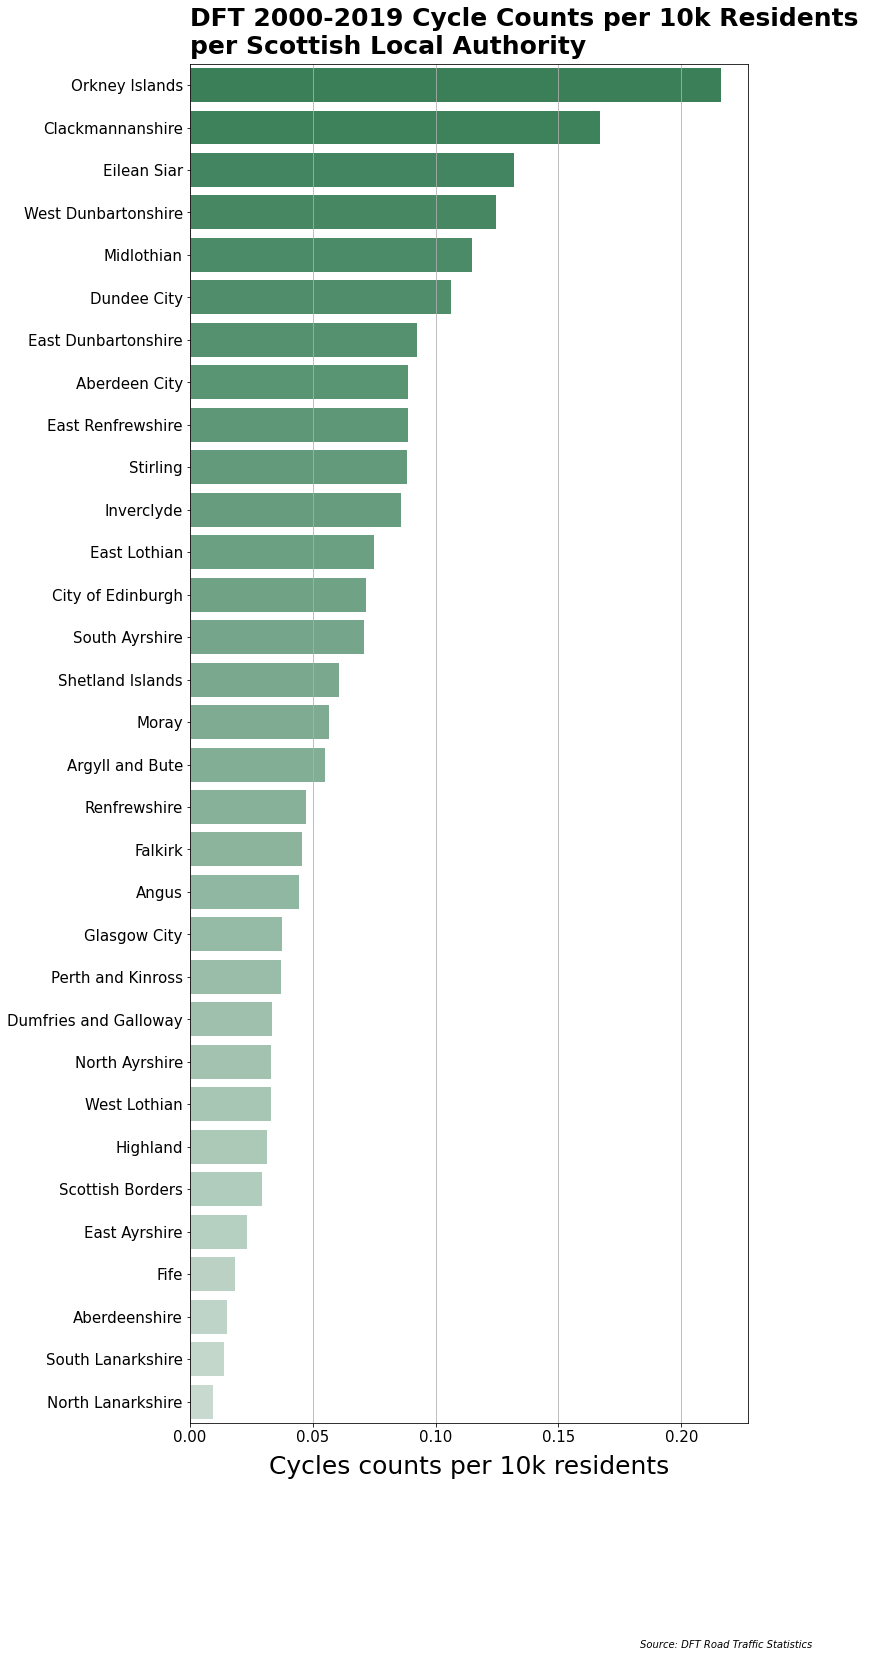

In [17]:
# Bar plot of bikes per 10k residents
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 25))
pal = sns.light_palette("seagreen", n_colors=40, reverse=True)
sns.barplot(x = bikes_per_10k_residents, y = bikes_per_10k_residents.index, palette=pal)
ax.set_title("DFT 2000-2019 Cycle Counts per 10k Residents \nper Scottish Local Authority",
            pad=10, loc = "left", fontdict={'weight':'heavy', 'color':'black'}, fontsize=25)
ax.set_ylabel("")
ax.set_xlabel("Cycles counts per 10k residents", fontsize=25, labelpad=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.figtext(x=.75, y=0, 
            s='Source: DFT Road Traffic Statistics', 
            fontdict={'style':'oblique', 'color':'black'})
plt.grid(which='major', axis='x')
plt.show()

# Q2: MapViz of Bikes

In [18]:
# Selecting relevant columns for mapviz
map_cols = ['count_point_id', 'local_authority_name', 'count_date', 'road_name',
            'hour', 'direction_of_travel', 'latitude', 'longitude', 'population']
map_df = df_tidy[map_cols]

In [19]:
# Manually finding central lat and long of 
# each local authority
auth_names = sorted(map_df.local_authority_name.unique())
lat_longs = [[57.148499575046166, -2.0994503154974553],[57.273760025881934, -2.5166643080179645],[56.72768401017168, -2.9246922126651884],[56.09740006583508, -5.505829190157146],[55.95233877595505, -3.188860106840768],[56.14959079238047, -3.7457616021792624],[55.085097679793755, -3.9648777663637222],[56.46547771536677, -2.9702673126999213],[55.465299446108205, -4.307460244966752],[55.950679905225755, -4.21793961543706],[55.943997191276125, -2.7324635644378654],[55.75505725179119, -4.362197202163319],[58.24343874214309, -6.382783267363518],[56.00349190992439, -3.7933138794341983], [56.246895135851844, -3.087199713717091],[55.85890878015006, -4.246879570599694],[57.47148264549703, -4.918077719700579],[55.910241417028985, -4.73843337649973],[55.8380756961132, -3.091164797971764],[57.507658214268204, -3.2238412189671544], [55.72279452380807, -4.743315946865488], [55.87990377885493, -3.943898088843739], [59.02526102084918, -3.006499055095088], [56.55895608244633, -3.8058868668882613], [55.84937262539755, -4.534918906544666], [55.580570268563, -2.726163579854028], [60.33439464263681, -1.2344978915362006], [55.29083618369606, -4.6958972343105625], [55.59988380366663, -3.7749667034686474], [56.22513721244209, -4.338586907406815], [55.982771806368184, -4.5149571176594625], [55.88803749019023, -3.570496063254735]]
coords_dict = dict(zip(auth_names, lat_longs)) 
coords_df = pd.DataFrame.from_dict(coords_dict, orient='index', columns=['cent_lat', 'cent_long'])
coords_df.reset_index(level=0, inplace=True)
coords_df.rename(columns={'index':'local_authority_name'}, inplace=True)

In [20]:
# Finidng mean lat and long of each local authority
# and storing in new df
coords_df_tidy = df_tidy[['local_authority_name', 'latitude', 'longitude']]
coords_df_tidy = coords_df_tidy.groupby('local_authority_name')[['latitude', 'longitude']].mean()
coords_df_tidy.rename(columns={'latitude':'cent_lat', 'longitude':'cent_long'}, inplace=True) # Renaming columns
coords_df_tidy.reset_index(level = 0, inplace = True)

In [21]:
# Full outer SQL join of map_df and coords_df_tidy
map_df = pd.merge(map_df, coords_df_tidy, on='local_authority_name', how='outer')

In [22]:
# Matching dft authority names with external authority names
# JSON file is of local authority borders for choropleth map
auth_geo = os.path.join(os.getcwd(), 'data/local_auth.json')
with open(auth_geo) as f:
    scotland_topo = json.load(f)
topo_names = []
for i in range(32):
    topo_names.append(scotland_topo['objects']['lad']['geometries'][i]['properties']['LAD13NM'])

In [23]:
# Reference: https://towardsdatascience.com/choropleth-maps-with-folium-1a5b8bcdd392
# Initialise map of Scotland
scotland_bright = folium.Map(location=[57.8906712, -4.2026458], zoom_start=6.25, tiles='cartodbpositron')

In [24]:
# Create choloropleth of population data
choropleth = folium.Choropleth(geo_data = scotland_topo,              
    topojson = 'objects.lad',
    key_on ='feature.properties.LAD13NM',
    data = map_df,
    columns = ['local_authority_name', 'population'], 
    name ='choropleth',                                   
    fill_color = 'Blues', 
    fill_opacity = 1, # Prev 0.7
    line_opacity = 0.5, # Prev 0.2
    highlight = True,
    legend_name='Population',
    smooth_factor=0,
).add_to(scotland_bright) # Prev scotland

# Add labels indicating local authority name
style_function = "font-size: 12px"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['LAD13NM'], style=style_function, labels=False))

# Add layer control
folium.LayerControl().add_to(scotland_bright)

In [25]:
bikes_viz_df = bikes_per_10k_residents.to_frame()
bikes_viz_df.rename(columns={0:'bikes_10k'}, inplace=True)
bikes_viz_df.reset_index(level=0, inplace=True) # Resetting index
bikes_viz_df = pd.merge(bikes_viz_df, coords_df_tidy, on='local_authority_name', how='outer')

In [26]:
# Add circles whose sizes represent bikes per 10k residents
normalizer = max(bikes_viz_df['bikes_10k'])
for auth_name in auth_names:
    folium.Circle(
        location = [bikes_viz_df.loc[bikes_viz_df['local_authority_name'] == auth_name]['cent_lat'].values[0], 
                bikes_viz_df.loc[bikes_viz_df['local_authority_name'] == auth_name]['cent_long'].values[0]],
        radius = float(bikes_viz_df.loc[bikes_viz_df['local_authority_name'] == auth_name]['bikes_10k'].values[0]*7e4),
        color = 'mediumseagreen',
        fill_color = 'mediumseagreen',
        popup = f"Bike density per 10k residents: {round(bikes_viz_df.loc[bikes_viz_df['local_authority_name'] == auth_name]['bikes_10k'].values[0], 3)}",
        tooltip=auth_name
    ).add_to(scotland_bright)

In [27]:
scotland_bright

# Q3: roads + vehicles

In [28]:
# Defining months for ordering purposes
months = ["March", "April", "May", "June", "July", "August",
          "September", "October", "November"]

# Extract relevant columns for observing variation of counts
# over the different months for different vehicles
vehicle_cols = ['count_date', 'bikes', 'motorcycles', 'cars', 'buses', 'lgvs', 'hgvs']
vehicle_df = df_tidy.copy()
vehicle_df = vehicle_df[vehicle_cols]
# Create new column for month name
vehicle_df.loc[:,'month'] = vehicle_df['count_date'].dt.month_name()
# Ordering month_df chronologically
vehicle_df.loc[:,'month'] = pd.Categorical(vehicle_df['month'], categories=months, ordered=True)
vehicle_df.sort_values(by='month', inplace=True)

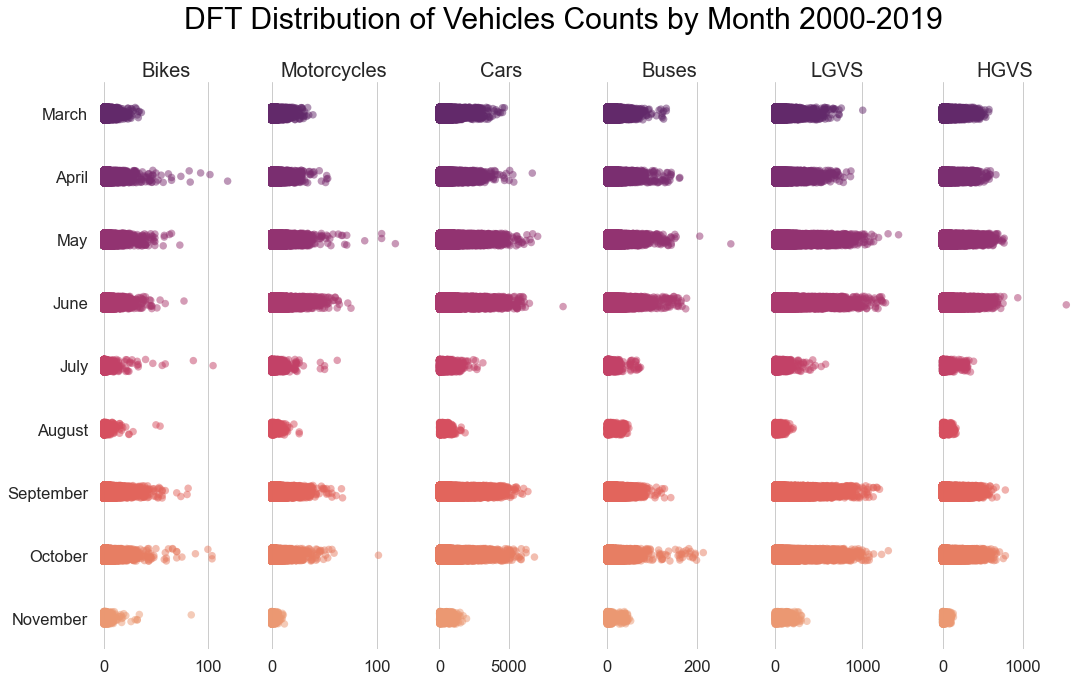

In [29]:
sns.set_theme(style='whitegrid', font_scale=1.5)

# Create the PairGrid
vg = sns.PairGrid(vehicle_df.sort_values('cars', ascending=False),
                 x_vars=vehicle_df.columns[1:-1], y_vars=['month'],
                 height=10, aspect=.25)
plt.subplots_adjust(top=.875)
vg.fig.suptitle("DFT Distribution of Vehicles Counts by Month 2000-2019",  
                fontdict={'weight':'bold', 'color':'black'},
                fontsize=30)

# Draw a scatter plot using stripplot function
vg.map(sns.stripplot, size=7.5, orient='h', marker='o',
       palette='flare_r', linewidth=1, edgecolor='none',  alpha=.5)

# Use semantically meaningful titles for the columns
titles = ["Bikes", "Motorcycles", "Cars", "Buses",
          "LGVS", "HGVS"]

for ax, title in zip(vg.axes.flat, titles):
    # Set a different title for each axes
    ax.set_title(title, fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(False)

sns.despine(left=True, bottom=True)

In [30]:
# Extract relevant columns for observing variation of counts
# over the different months for different road_types
roads_cols = ['count_date', 'road_type']
roads_df = df_tidy[roads_cols]

In [31]:
# Pivoting data wider so M, A, B, C, U become columns
roads_df = roads_df.pivot_table(index=['count_date'], columns=['road_type'], aggfunc=len, fill_value=0)

In [32]:
roads_df.reset_index(level=0, inplace=True)

In [33]:
# Making type_df chronologically ordered
roads_df['month'] = roads_df['count_date'].dt.month_name()
roads_df['month'] = pd.Categorical(roads_df['month'], categories=months, ordered=True)
roads_df.sort_values(by='month', inplace=True)

In [34]:
# Reordering type_df columns
roads_cols = ['count_date', 'month', 'M', 'A', 'B', 'C', 'U']
roads_df = roads_df.reindex(columns=roads_cols)

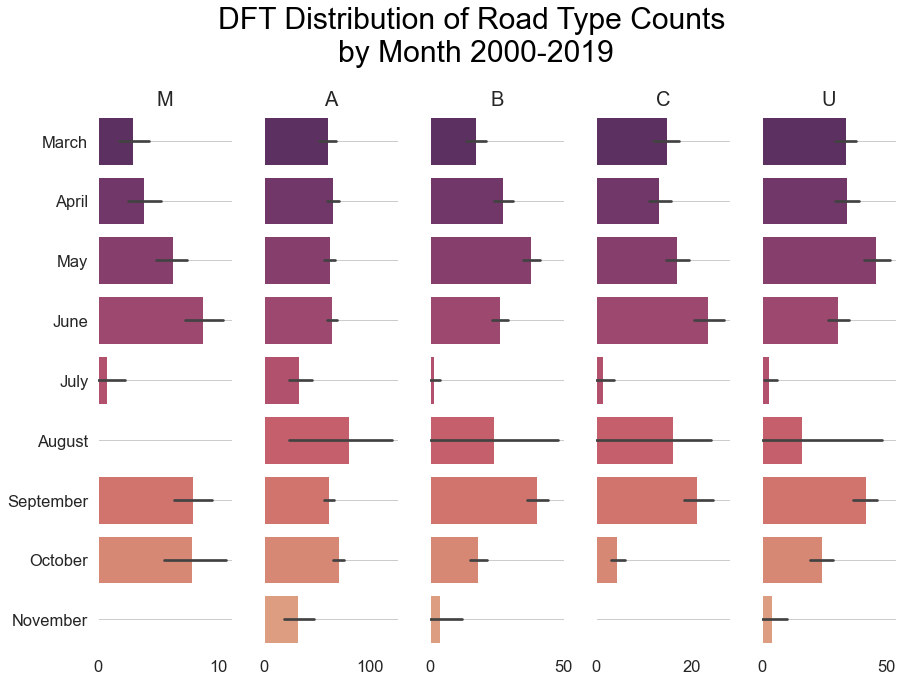

In [50]:
sns.set_theme(style='whitegrid', font_scale=1.5)
# Create the PairGrid
roads_g = sns.PairGrid(roads_df.sort_values('A', ascending=False),
                 x_vars=roads_df.columns[2:], y_vars=['month'],
                 height=10, aspect=.25)
plt.subplots_adjust(top=.835)
roads_g.fig.suptitle("DFT Distribution of Road Type Counts \nby Month 2000-2019",  
                fontdict={'weight':'bold', 'color':'black'},
                fontsize=30)


# Draw a scatter plot using stripplot function
roads_g.map(sns.barplot, palette="flare_r")

# Use semantically meaningful titles for the columns
titles = ["M", "A", "B", "C", "U"]

for ax, title in zip(roads_g.axes.flat, titles):
    # Set a different title for each axes
    ax.set_title(title, fontsize=20)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
sns.despine(left=True, bottom=True)

# Q1: Bar chart of [X] longest roads showing start and end locations

### Method
* Filter by distinguishing road name 
* Ignore U and C roads 
* We have start and end junctions (general locations)
* How do we calculate distance?
    1. Add up link lengths
    2. Verify with Google Maps



# Q2: Local authorities managing number of roads - mapviz - fixed point in time

### Outcome
* 2019 map of roads managed
* Static map of Scotland with gradient colour scheme

### Method
* Group by `local_authority_name`, `count_id`
* Break down total number of roads per authority into `road_names`
* Possible weight matrix to give larger, busier roads a larger influence in the map - don't want to give U and C thes same weighting as M and A roads
* In `road_name` variable, cut string such that it's only a single character

### Stretch and Challenge
* Maintenance data to observe which authority spends the most on maintainance

### Extra Packages:
* folium
* geopandas


# Q3: Interactive visualization of the usage of HGVs on motorways in Scotland ~distribution of vehicles over each type of road over the past [X] years~ from 2000 to 2019

### Outcome
* x-axis: discrete vehicle type data e.g.  cars, bikes, buses, hgvs, lgvs etc
* y-axis: type of road e.g. M, A, B, C, U
* Scatter point for each category where size indicates prevalence of that type of vehicle on that type of road
* Slider which shows variation of data over [X] years


### Method
* Group C and U roads
* Normalize scatter points by \pi*R^2


### Stretch and Challenge
* We have dotted line outline of average of previous 5 years giving the reader some indication of growth/reduction
* x-axis: as emojis


### Extra packages
* plotly - used to vary the datapoints



In [ ]:
# Unique roads, because we can
unique_motorways = df_tidy.loc[df_tidy.road_type == 'M'].road_name.unique()

In [ ]:
# Extracting HGV-only data
hgv_cols = ['count_date', 'hour', 'road_name', 'road_type', 'latitude', 'longitude', 'bikes']
hgv_df = df_tidy[hgv_cols]
hgv_df = hgv_df.loc[hgv_df['bikes'] > 0]


In [ ]:
hgv_df.loc[hgv_df['road_type']=='M']

In [ ]:
hgv_df

In [ ]:
# Creating Point objects for plotting HGV counts and their locations
# on gpd map
geometry = [Point(xy) for xy in zip(hgv_df['longitude'], hgv_df['latitude'])]
# Specifying coordinate reference system
crs = {'init': 'EPSG:4326'}
hgv_df.drop(['latitude', 'longitude'], inplace=True, axis = 1) # drop unnessecary cols

In [ ]:
geo_df = gpd.GeoDataFrame(hgv_df, crs = crs, geometry = geometry) # Create geodf

In [ ]:
# Read in external shape file of Scottish roads
scotland_roads = gpd.read_file('data/roads.shp')

In [ ]:
#scotland_auth_shape = gpd.read_file('pub_las.shp')

In [ ]:
fig, axis = plt.subplots(figsize = (18, 24))
scotland_roads.plot(ax = axis, color = 'gray', alpha = 0.3)
#scotland_auth_shape.plot(ax = axis, color = 'white', edgecolor = 'black')
#geo_df[geo_df['road_type'] == 'B'].plot(ax = axis, markersize = 15, color = 'red', marker = 'o', label = 'B')
#geo_df[geo_df['road_type'] == 'A'].plot(ax = axis, markersize = 15, color = 'green', marker = 'o', label = 'A')
geo_df[geo_df['road_type'] == 'M'].plot(ax = axis, markersize = 200, color = 'blue', marker = 'x', label = 'M')
plt.legend(prop = {'size': 15})

# Q4: Time of day viz?

### Outcome
* x-axis: Hours of the day (07:00 - 18:00)
* y-axis-1: `all_vehicles`
* y-axis-2: types of vehicle (faceted plot)
* Light alpha filled densities

### Method
* Get hours day
* Group vehicle count by hour type
* Further subset those counts by vehicle

In [118]:
tod_df = df_tidy[['hour'] + new_names] # Extracting relevant variables
tod_df = tod_df.groupby('hour').sum()  # Find total counts of each vehicle at every hour
tod_df.reset_index(level=0, inplace=True) # Index with numbers not names
tod_df = tod_df.melt(id_vars='hour', var_name='vehicle_type') # Pivot longer
tod_df.vehicle_type = tod_df.vehicle_type.astype('category')  # Converting datatype to categorical

In [119]:
# Define relevant data to plot
x = tod_df.hour.unique()
y1 = tod_df.loc[tod_df.vehicle_type=='cars']['value']
y2 = tod_df.loc[tod_df.vehicle_type=='lgvs']['value']
y3 = tod_df.loc[tod_df.vehicle_type=='hgvs']['value']
y4 = tod_df.loc[tod_df.vehicle_type=='buses']['value']
y5 = tod_df.loc[tod_df.vehicle_type=='motorcycles']['value']
y6 = tod_df.loc[tod_df.vehicle_type=='bikes']['value']
y = [y1, y2, y3, y4, y5, y6] # Amalgamate into single list

In [171]:
labels = ['CARS', 'LGVS', 'HGVS', 'BUSES', 'MBIKES', 'BIKES']
xticks_ = np.arange(7, 19)

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

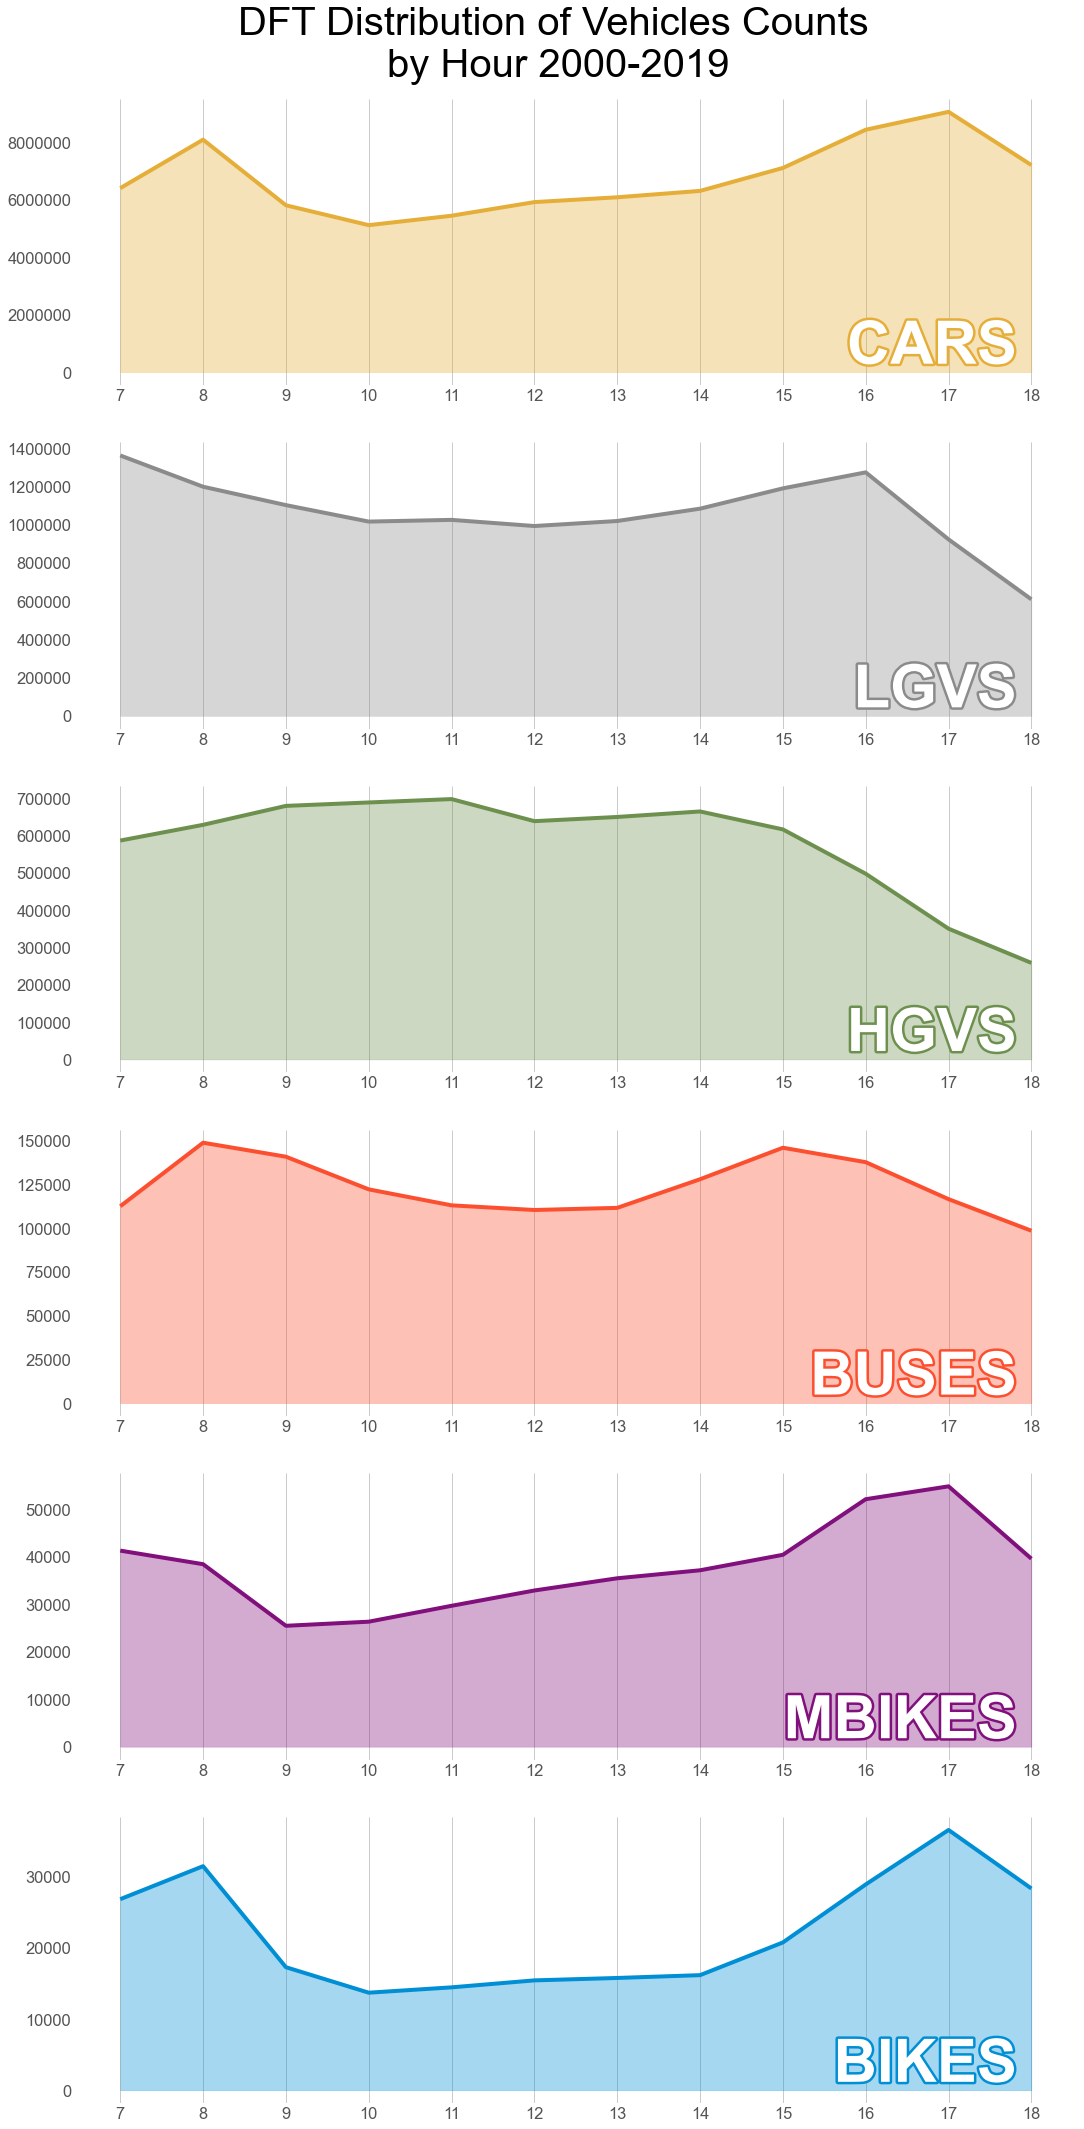

In [200]:
plt.style.use('fivethirtyeight')
# Plotting facetgrid manually
fig, axes = plt.subplots(6, 1, sharex=False, sharey=False, figsize=(16, 32), facecolor='white')
plt.subplots_adjust(top=.94)

fig.suptitle("DFT Distribution of Vehicles Counts \nby Hour 2000-2019",  
                fontdict={'weight':'bold', 'color':'black'},
                fontsize=40)
hues = ['#e5ae38', '#8b8b8b', '#6d904f', '#fc4f30', '#810f7c', '#008fd5']
for i, ax in enumerate(axes):
    sns.lineplot(data=tod_df, x='hour', y=y[i], ax=ax, hue='vehicle_type')
    ax.fill_between(x, y[i], color=hues[i], alpha=0.35)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xticks(xticks_),
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f')),
    ax.get_legend().remove()
    t = ax.annotate(s=f"{labels[i]}", 
                xy=(10,10), 
                xycoords='data', 
                textcoords='axes fraction', 
                xytext=(.94,.075),
                ha='right',
                fontsize=60,
                fontweight='bold',
                color='white')
    t.set_path_effects([path_effects.Stroke(linewidth=5, foreground=hues[i]),
                       path_effects.Normal()])
    ax.set_facecolor("white")
    ax.xaxis.grid(True)
    ax.yaxis.grid(False)
    sns.despine(left=True, bottom=True)

### TODOs for Q4:

* Add all hours to x-axis
* Format y-axis, and change labels
* Add hover on hour points to read values
* Display legend of colour <--> vehicle_type

# Q5: Bikes observed per 10k residents / capita per local authority 

### Caveats
1. Count data of bikes is assumed to be representative of the prevalence of bikes in the authority
2. A bike count within a local authority maps to that bike actually belonging to that authority
3. Double counting effects are ignored

This is because bikes are not registered vehicles and hence this assumption has to be made. We think this is a reasonable assumption since bikes are used for micro-mobility in the majority of cases.

### Outcome
* Horizontal bar chart ordered in descending order

### Method
* Get population data and store in tidy dataframe
* Plot the data

## Additional
* Encode or visualise population data
* Bikes per 10,000 residents - same as log